# Recruitment test

## About the input

The input is made of three sections.

* The first one has a number n with the number of lines that the first section will have.

* Then comes n lines, each one with a number i and a string s in the following format: i-s. The number is just an identifier that you are going to use later to link each career position in order to build a path. The string is the name of the career position.

* A number e comes and e lines follows it, containing two numbers, j and k, that represents the identifier of the career position.

* Then comes a number a and the following a lines must be answered with a possible career path.

Example:

```3
1-High School Graduate
2-Bachelor of Computer Science
3-Software Engineer
2
1 2
2 3
1
John is a High School Graduate and wants to become a Software Engineer
```

Can be answered with: `High School Graduate - Bachelor of Computer Science - Software Engineer`

There's no required format for the answer. There might be multiple answers and it's up to you to choose one.

### More info

* You must use Python 2/3.
* The idea is more important than the correctness of the answers.
* Test your code.

# Solving problem Using Networkx function

In [1]:
import numpy as np
import re
import pandas as pd
import codecs
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_file = 'jumpcareers/recruitment-test/input'
input_file_2 = 'example_input.txt'

In [6]:
def career_path(input_file):    
    with open(input_file,'r') as f:
        text = f.read().lower()
        text = text.split('\n')
        routes_dict = {}
        edges = []
        student_start_end = []
        student_paths = []
        
        #Extracting the career options and their numbers
        for i in range(1,int(text[0])+1):
            route = text[i].split('-')
            routes_dict[route[0]] = route[1]

        #Extracting the links between career options
        for i in range(int(text[0])+2,int(text[int(text[0])+1])+int(text[0])+2):
            edges.append(tuple(text[i].split()))

        #Extracting start and end career options
        for i in range(int(text[int(text[0])+1])+int(text[0])+3,len(text)-1):
            k = [text[i][text[i].index('is a')+5:text[i].index('and')-1],text[i][text[i].index('become a')+9:]]
            output = [key for key, value in routes_dict.items() for i in k if i == value]
            student_start_end.append(output)

        #Creating graph
        G = nx.Graph()
        G.add_nodes_from(routes_dict.keys())
        G.add_edges_from(edges)

        #Finding the career paths and printing the outputs
        for i in student_start_end:
            shortest_path = nx.shortest_path(G,source=i[0],target=i[1])
            word_path = [routes_dict[i] for i in shortest_path]
            student_paths.append(' - '.join(word_path))
        
        #Plotting the links between career options
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 10)
        nx.draw_networkx_labels(G, pos)
        nx.draw_networkx_edges(G, pos,  edge_color='r', arrows=True)
        nx.draw_networkx_edges(G, pos,  arrows=False)
        plt.show()
        
        return student_paths

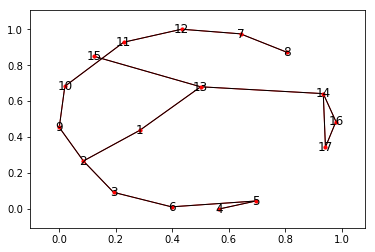

In [22]:
test_output = career_path(input_file)

In [23]:
test_output

['high school graduate - bachelor of computer science - software engineer - lead developer - project manager - cto',
 'high school graduate - bachelor of psychology - hr consultant - hr executive',
 'software engineer - lead developer - project manager - cto',
 'high school graduate - bachelor of psychology - psychologist',
 'bachelor of computer science - software engineer - lead developer - project manager - cto - vp - ceo']

# Solving problem without Networkx 

In [117]:
def find_shortest_path(graph, start, end, path=[]):
    '''Finding the shortest path from start career option to end career choice'''
        path = path + [start]
        if start == end:
            return path
        if start not in graph:
            return None
        shortest = None
        for node in graph[start]:
            if node not in path:
                newpath = find_shortest_path(graph, node, end, path)
                if newpath:
                    if not shortest or len(newpath) < len(shortest):
                        shortest = newpath
        return shortest

In [168]:
def career_path_without_nx(input_file):    
    with open(input_file,'r') as f:
        text = f.read().lower()
        text = text.split('\n')
        routes_dict = {}
        edges = []
        student_start_end = []
        student_paths = []
        
        #Extracting the career options and their numbers
        for i in range(1,int(text[0])+1):
            route = text[i].split('-')
            routes_dict[route[0]] = route[1]
        
        #Extracting the links between career options
        graph_dict = defaultdict(str)
        for i in range(int(text[0])+2,int(text[int(text[0])+1])+int(text[0])+2):
            x = text[i].split()
            if x[0] in graph_dict:
                graph_dict[x[0]].append(x[1])
            else:
                graph_dict[x[0]] = [x[1]]
        
        #Extracting start and end career options
        for i in range(int(text[int(text[0])+1])+int(text[0])+3,len(text)-1):
            k = [text[i][text[i].index('is a')+5:text[i].index('and')-1],text[i][text[i].index('become a')+9:]]
            output = [key for key, value in routes_dict.items() for i in k if i == value]
            student_start_end.append(output)
            
        #Finding the career paths and printing the outputs
        for i in student_start_end:
            shortest_path = find_shortest_path(graph_dict,i[0],i[1])
            if shortest_path:
                word_path = [routes_dict[i] for i in shortest_path]
                student_paths.append(' - '.join(word_path))
            
        return student_paths

In [169]:
career_path_without_nx(input_file)

['high school graduate - bachelor of computer science - software engineer - lead developer - project manager - cto',
 'high school graduate - bachelor of psychology - hr consultant - hr executive',
 'software engineer - lead developer - project manager - cto',
 'high school graduate - bachelor of psychology - psychologist']